Data: 2021/12/22<br>

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pl
import seaborn as sns 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [5]:
truth =      ["Panda", "Panda", "Panda", "Panda", "Panda", "Panda",  "Bear","Bear","Bear", "Bear", "Bear", "Bear",     "Lion", "Lion", "Lion", "Lion", "Lion", "Lion",  "Yak", "Yak", "Yak", "Yak", "Yak", "Yak"]

In [6]:
prediction = ["Panda", "Bear", "Yak", "Panda", "Panda", "Bear",     "Bear","Panda","Panda", "Panda", "Bear", "Yak",   "Lion", "Yak", "Lion", "Yak", "Lion", "Lion",    "Yak", "Yak", "Lion", "Lion", "Yak", "Bear"]

In [7]:
print(truth)
print(prediction)

['Panda', 'Panda', 'Panda', 'Panda', 'Panda', 'Panda', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Lion', 'Lion', 'Lion', 'Lion', 'Lion', 'Lion', 'Yak', 'Yak', 'Yak', 'Yak', 'Yak', 'Yak']
['Panda', 'Bear', 'Yak', 'Panda', 'Panda', 'Bear', 'Bear', 'Panda', 'Panda', 'Panda', 'Bear', 'Yak', 'Lion', 'Yak', 'Lion', 'Yak', 'Lion', 'Lion', 'Yak', 'Yak', 'Lion', 'Lion', 'Yak', 'Bear']


In [8]:
# Qustion 1 Calculate Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(truth,prediction)
print(confusion_matrix)

[[2 0 3 1]
 [0 4 0 2]
 [2 0 3 1]
 [1 2 0 3]]


<AxesSubplot:>

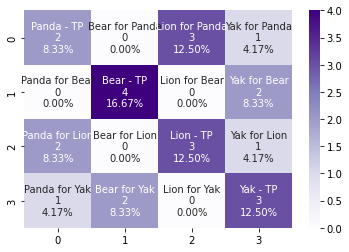

In [9]:
# Qustion 2 Heat Map showing Label/Class, Number and Percentage in each cell
group_names = ['Panda - TP', 'Bear for Panda','Lion for Panda', 'Yak for Panda', 'Panda for Bear', 'Bear - TP', 'Lion for Bear', 'Yak for Bear', 'Panda for Lion', 'Bear for Lion', 'Lion - TP', 'Yak for Lion', 'Panda for Yak', 'Bear for Yak', 'Lion for Yak', 'Yak - TP']
group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(4,4)
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Purples') 

In [10]:
# Qustion 3 Accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(truth, prediction)
print(accuracy) 

0.5


In [11]:
# Qustion 4 Misclassification
misclassification = 1 - accuracy
print(misclassification) 

0.5


In [12]:
# Qustion 5 Precision
from sklearn.metrics import precision_score
precision = precision_score(truth, prediction, average=None, zero_division=0)
print(precision) 

[0.4        0.66666667 0.5        0.42857143]


In [13]:
# Qustion 6 ReCall
from sklearn.metrics import recall_score
recall = recall_score(truth, prediction, average=None, zero_division=0)
print(recall) 

[0.33333333 0.66666667 0.5        0.5       ]


In [14]:
# Qustion 7 Calculate F1
from sklearn.metrics import f1_score
F1 = f1_score(truth, prediction, average=None, zero_division=0)
print(F1) 

[0.36363636 0.66666667 0.5        0.46153846]


In [15]:
# Qustion 7 Classification Report
from sklearn.metrics import classification_report
classification_report = classification_report(truth, prediction)
print(classification_report) 

              precision    recall  f1-score   support

        Bear       0.40      0.33      0.36         6
        Lion       0.67      0.67      0.67         6
       Panda       0.50      0.50      0.50         6
         Yak       0.43      0.50      0.46         6

    accuracy                           0.50        24
   macro avg       0.50      0.50      0.50        24
weighted avg       0.50      0.50      0.50        24



In [16]:
# Qustion 7 ROC and AUC
print(truth)
print(prediction)

truth1, prediction1 = truth, prediction

unique, truth1 = np.unique(truth, return_inverse = True)
for i in range(len(unique)):
    for j in range(len(prediction1)):
        if prediction1[j] == unique[i]:
            prediction1[j] = i
prediction1 = np.array(prediction1)
print(unique)
print(truth1)
print(prediction1)

['Panda', 'Panda', 'Panda', 'Panda', 'Panda', 'Panda', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Bear', 'Lion', 'Lion', 'Lion', 'Lion', 'Lion', 'Lion', 'Yak', 'Yak', 'Yak', 'Yak', 'Yak', 'Yak']
['Panda', 'Bear', 'Yak', 'Panda', 'Panda', 'Bear', 'Bear', 'Panda', 'Panda', 'Panda', 'Bear', 'Yak', 'Lion', 'Yak', 'Lion', 'Yak', 'Lion', 'Lion', 'Yak', 'Yak', 'Lion', 'Lion', 'Yak', 'Bear']
['Bear' 'Lion' 'Panda' 'Yak']
[2 2 2 2 2 2 0 0 0 0 0 0 1 1 1 1 1 1 3 3 3 3 3 3]
[2 0 3 2 2 0 0 2 2 2 0 3 1 3 1 3 1 1 3 3 1 1 3 0]


In [17]:
pred = []
for i in range(len(prediction1)):
    if prediction1[i] == 0:
        pred.append([1,0,0,0])
    if prediction1[i] == 1:
        pred.append([0,1,0,0])
    if prediction1[i] == 2:
        pred.append([0,0,1,0])
    if prediction1[i] == 3:
        pred.append([0,0,0,1])
pred = np.array(pred)
print(pred)

[[0 0 1 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]]


In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(truth1, pred[:,i], pos_label=i) 

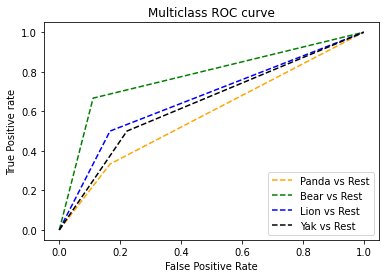

In [19]:
# Plotting  ROC and AUC  
from matplotlib import pyplot 
pyplot.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Panda vs Rest')
pyplot.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Bear vs Rest')
pyplot.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Lion vs Rest')
pyplot.plot(fpr[3], tpr[3], linestyle='--',color='black', label='Yak vs Rest')
pyplot.title('Multiclass ROC curve')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive rate')
pyplot.legend(loc='best')
pyplot.savefig('Multiclass ROC',dpi=300);

In [20]:
from sklearn.metrics import precision_recall_curve
lr_precision, lr_recall, lr_f1, lr_auc = {}, {}, {}, {}
n_class = 4
for i in range(n_class):    
    lr_precision[i], lr_recall[i], _ = precision_recall_curve(truth1, pred[:,i], pos_label=i) 
    
for i in range(n_class):    
    lr_f1[i], lr_auc[i] = f1_score(truth1, pred[:,i],  average='micro') , auc(lr_recall[i], lr_precision[i])

In [23]:
print('Unknown Model-Panda: f1=%.3f auc=%.3f' % (lr_f1[0], lr_auc[0]))
print('Unknown Model-Bear: f1=%.3f auc=%.3f' % (lr_f1[1], lr_auc[1]))
print('Unknown Model-Lion: f1=%.3f auc=%.3f' % (lr_f1[2], lr_auc[2]))
print('Unknown Model-Yak: f1=%.3f auc=%.3f' % (lr_f1[3], lr_auc[3]))

Unknown Model-Panda: f1=0.167 auc=0.450
Unknown Model-Bear: f1=0.417 auc=0.708
Unknown Model-Lion: f1=0.125 auc=0.562
Unknown Model-Yak: f1=0.292 auc=0.527


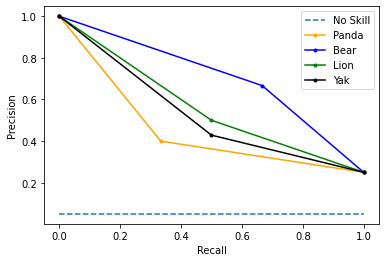

In [25]:
# Precision-Recall Curves No need i think, but i write anyway
no_skill = len(truth1[truth1==1]) / len(truth1)
pyplot.plot([0, 1], [no_skill-0.2, no_skill-0.2], linestyle='--', label='No Skill')
pyplot.plot(lr_recall[0], lr_precision[0], marker='.', color='orange', label='Panda')
pyplot.plot(lr_recall[1], lr_precision[1], marker='.', color='blue', label='Bear')
pyplot.plot(lr_recall[2], lr_precision[2], marker='.', color='green', label='Lion')
pyplot.plot(lr_recall[3], lr_precision[3], marker='.', color='black', label='Yak')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show() 

Thanks, all done!